In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_42024\182427799.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
counts = pd.read_csv('C:/Users/user/Downloads/2117ensemble.csv')

In [3]:
counts = counts.transpose()

In [4]:
counts.columns = counts.iloc[0] 

In [5]:
counts = counts.drop(counts.index[0])

In [6]:
counts

Tags,ENSG00000227232,ENSG00000279457,ENSG00000228463,ENSG00000225630,ENSG00000237973,ENSG00000248527,ENSG00000228327,ENSG00000237491,ENSG00000230092,ENSG00000177757,...,ENSG00000198727,ENSG00000210196,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000271254,ENSG00000275405
T2D_CTL_12h_i05,17,49,9,4,40,57,14,26,6,48,...,827,1044,4,262,147,45,26,54,446,20
T2D_CTL_18h_i05,11,21,7,4,27,66,5,7,10,26,...,715,697,3,99,51,29,9,24,174,13
T2D_CTL_24h_i05,13,25,3,7,38,60,13,26,2,27,...,798,780,1,151,66,24,22,15,264,8
T2D_CTL_30h_i05,28,42,11,12,48,76,29,17,8,66,...,985,1003,7,205,113,60,28,37,469,19
T2D_CTL_36h_i05,28,43,10,1,25,41,18,16,7,60,...,761,799,3,127,106,31,14,21,367,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGT_HGI_30h_i11,3,16,3,3,26,23,7,7,4,18,...,570,398,2,78,81,11,6,0,191,5
NGT_HGI_36h_i11,3,9,4,43,54,586,8,19,5,6,...,7081,384,1,17,27,6,23,0,108,0
NGT_HGI_42h_i11,3,17,1,47,36,564,3,4,0,17,...,7434,291,4,21,16,3,16,0,70,0
NGT_HGI_48h_i11,2,1,0,7,2,44,1,1,0,0,...,700,27,0,3,6,1,3,0,14,0


In [7]:
counts = counts.astype(float)

In [8]:
sample = pd.read_csv('c:/Users/user/Downloads/clin2117.csv')

In [9]:
sample.head(5)

,Run,Assay Type,AvgSpotLen,disease,GEO_Accession (exp),Group,Individual,Organism,Platform,source_name,Time,treatment
0,SRR15459490,RNA-Seq,200,T2D,GSM5518773,T2D_CTL,i05,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,12h,CTL
1,SRR15459498,RNA-Seq,200,T2D,GSM5518781,T2D_CTL,i05,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,18h,CTL
2,SRR15459491,RNA-Seq,200,T2D,GSM5518774,T2D_CTL,i05,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,24h,CTL
3,SRR15459499,RNA-Seq,200,T2D,GSM5518782,T2D_CTL,i05,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,30h,CTL
4,SRR15459492,RNA-Seq,200,T2D,GSM5518775,T2D_CTL,i05,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,36h,CTL


In [41]:
sample.tail()

,Run,Assay Type,AvgSpotLen,disease,GEO_Accession (exp),Group,Individual,Organism,Platform,source_name,Time,treatment
181,SRR15459441,RNA-Seq,200,NGT,GSM5518724,NGT_HGI,i11,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,30h,HGI
182,SRR15459434,RNA-Seq,200,NGT,GSM5518717,NGT_HGI,i11,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,36h,HGI
183,SRR15459442,RNA-Seq,200,NGT,GSM5518725,NGT_HGI,i11,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,42h,HGI
184,SRR15459435,RNA-Seq,200,NGT,GSM5518718,NGT_HGI,i11,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,48h,HGI
185,SRR15459443,RNA-Seq,200,NGT,GSM5518726,NGT_HGI,i11,Homo sapiens,ILLUMINA,Primary myotubes from vastus lateralis,54h,HGI


In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sample['Label']=labelencoder.fit_transform(sample.iloc[:,3].values)

In [11]:
#scaling the data
data_scaled = StandardScaler().fit_transform(counts)

In [12]:
pca_2c = PCA(n_components = 2)
pca_2c_features = pca_2c.fit_transform(data_scaled)

pca_2c_df = pd.DataFrame(
    data = pca_2c_features, 
    columns = ['PC1', 'PC2'])

target = list(sample['disease'])

pca_2c_df['target'] = target

expl_var = round(sum(pca_2c.explained_variance_ratio_) * 100, 2)

pca1_expl_var = round(pca_2c.explained_variance_ratio_[0] * 100, 2)
pca2_expl_var = round(pca_2c.explained_variance_ratio_[1] * 100, 2)

x_title = "PC1 (" + str(pca1_expl_var) + "%)"
y_title = "PC2 (" + str(pca2_expl_var) + "%)"

sub_title = "(Explained variance for PC1 and PC2 : " + str(expl_var) + "%)"
title = "PCA Plot \n" + sub_title

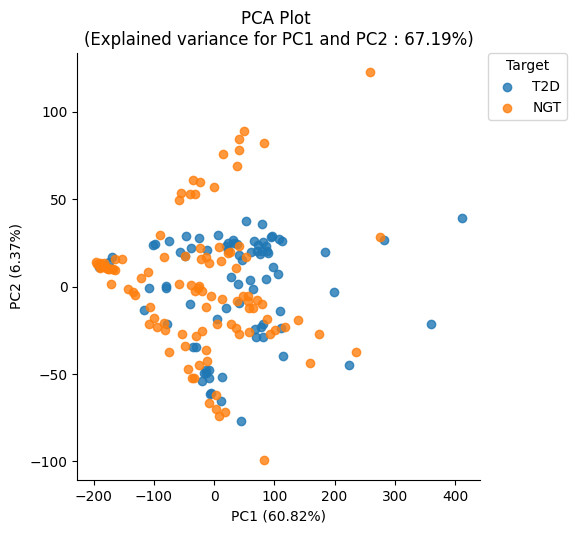

In [13]:
sns.lmplot(
    x = 'PC1', 
    y = 'PC2',
    data = pca_2c_df,
    hue = 'target',
    fit_reg = False,
    legend = False
)
plt.title(title)
plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad = 0, title = 'Target')
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.show()

In [14]:
# Assign response, and split data for train and test
y =  sample['Label']
X_train, X_test, y_train, y_test = train_test_split(counts,
                                                    y,
                                                    test_size = 0.3,random_state=132)
                                                
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (130, 18482)
X_test shape (56, 18482)


In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {   'max_depth': 6,
         'eta': 0.2, 'subsample': 1,                   # optimised for model after tuning
         'objective': 'binary:logistic'             
        }

param['eval_metric'] = 'auc'                  
num_round = 100                                           # number of rounds for boosting
evallist = [(dtest, 'eval'),(dtrain, 'train')]            # eval test
progress = {}
model = xgb.train(param, dtrain, num_round, 
                     evals=evallist, evals_result = progress, 
                     verbose_eval=10, 
                     early_stopping_rounds=25) 

print(" ")
print("bincount y_test:", np.bincount(y_test))

[0]	eval-auc:0.96179	train-auc:0.99147
[10]	eval-auc:0.99736	train-auc:1.00000
[20]	eval-auc:1.00000	train-auc:1.00000
[28]	eval-auc:1.00000	train-auc:1.00000
 
bincount y_test: [33 23]


In [16]:
# Generate test predictions and assign to the nearest classification
preds = model.predict(dtest)
prediction =[]
for i in preds:
    if i >=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print("bincount prediction:", np.bincount(prediction))

bincount prediction: [35 21]


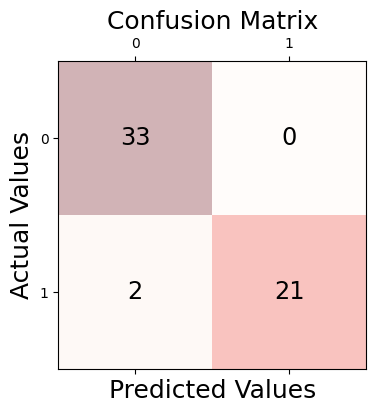

In [17]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = prediction)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))

ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

 
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [18]:
# Scores
print('Accuracy: %.3f' % accuracy_score(y_test, prediction))
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision: %.3f' % precision_score(y_test, prediction))
print('Recall: %.3f' % recall_score(y_test, prediction))

Accuracy: 0.964
F1 Score: 0.955
Precision: 1.000
Recall: 0.913


[08:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[08:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


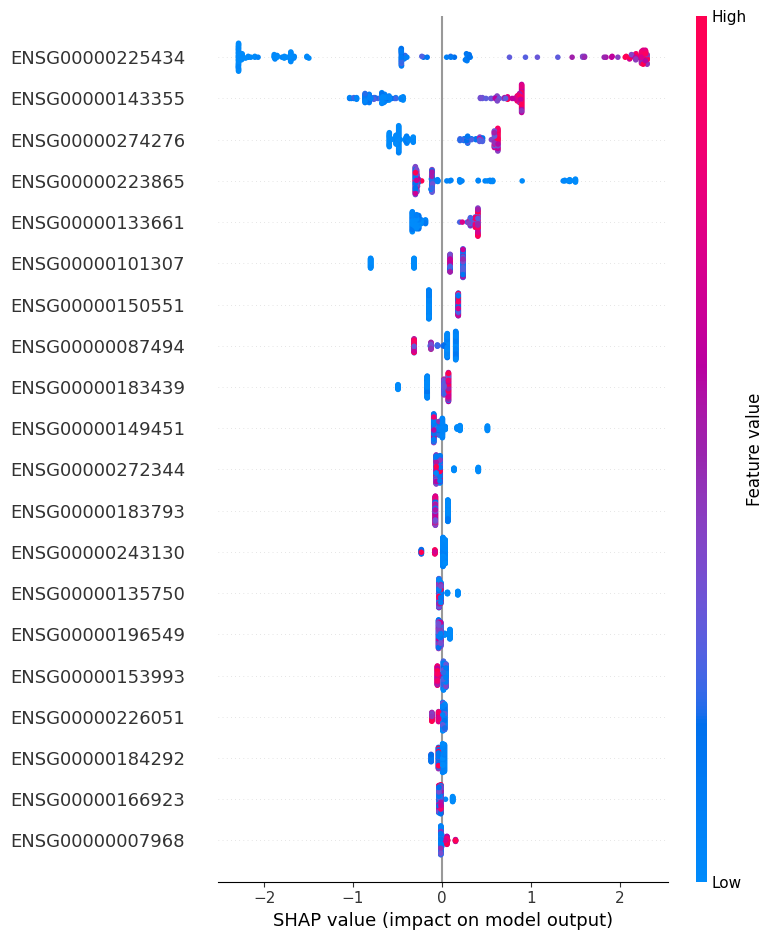

In [19]:
import shap
# Apply the generated model to the whole dataset and calculate the shap values
shap_values = shap.TreeExplainer(model).shap_values(counts)  
explainer = shap.TreeExplainer(model, counts)
expected_value = explainer.expected_value

features = counts.columns

# Convert data DF to array
data_ = counts.to_numpy()

# Run predictions for the whole dataset
d_data = xgb.DMatrix(counts, label=y)

preds_data = model.predict(d_data)
prediction_data =[]
for i in preds_data:
    if i >=0.5:
        prediction_data.append(1)
    else:
        prediction_data.append(0)

# Print the shap summary plot
shap.summary_plot(shap_values, counts, feature_names=counts.columns) 

ENSG00000225434	LINC01504
ENSG00000143355	LHX9
ENSG00000274276	CBSL
ENSG00000223865	HLA-DPB1
ENSG00000133661	SFTPD
ENSG00000101307	SIRPB1
ENSG00000150551	LYPD1
ENSG00000087494	PTHLH
ENSG00000183439	TRIM61
ENSG00000149451	ADAM33
ENSG00000272344	SNORD114-21
ENSG00000183793	NPIPA5
ENSG00000243130	PSG11
ENSG00000135750	KCNK1
ENSG00000196549	MME
ENSG00000153993	SEMA3D
ENSG00000226051	ZNF503-AS1
ENSG00000184292	TACSTD2
ENSG00000166923	GREM1
ENSG00000007968	E2F2
